In [1]:
import gdown
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv(r'C:\Users\igomp\OneDrive\Desktop\Projects_Data_scince\chicago crime\chicago_crime_data\Crimes_-_2001_to_Present.csv')

In [3]:
df.head(4)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"


In [4]:
# Select necessary features
selected_features = ['Date','Primary Type','Description','Domestic','Beat','District','Ward',
                     'Community Area','Latitude','Longitude']

# Drop unnecessary features
df_selected = df[selected_features]

In [5]:
df_selected['Primary Type'].unique()

array(['ASSAULT', 'HOMICIDE', 'BURGLARY', 'BATTERY', 'THEFT',
       'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'CRIMINAL SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'SEX OFFENSE', 'OTHER OFFENSE', 'WEAPONS VIOLATION', 'STALKING',
       'CRIMINAL TRESPASS', 'PROSTITUTION', 'ARSON', 'NARCOTICS',
       'KIDNAPPING', 'CONCEALED CARRY LICENSE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION',
       'OBSCENITY', 'LIQUOR LAW VIOLATION', 'INTIMIDATION',
       'HUMAN TRAFFICKING', 'GAMBLING', 'CRIM SEXUAL ASSAULT',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'RITUALISM', 'DOMESTIC VIOLENCE',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [6]:
risk_mapping = {
    'HOMICIDE': 'High','CRIMINAL SEXUAL ASSAULT': 'High','ROBBERY': 'High','ASSAULT': 'Medium',
    'BATTERY': 'Medium', 'BURGLARY': 'Medium','THEFT': 'Low','CRIMINAL DAMAGE': 'Medium',
    'DECEPTIVE PRACTICE': 'Low','OFFENSE INVOLVING CHILDREN': 'High','MOTOR VEHICLE THEFT': 'Medium','SEX OFFENSE': 'High',
    'OTHER OFFENSE': 'Low','WEAPONS VIOLATION': 'High','STALKING': 'High','CRIMINAL TRESPASS': 'Low','PROSTITUTION': 'Low',
    'ARSON': 'High','NARCOTICS': 'Medium','KIDNAPPING': 'High','CONCEALED CARRY LICENSE VIOLATION': 'Medium',
    'INTERFERENCE WITH PUBLIC OFFICER': 'Low','PUBLIC PEACE VIOLATION': 'Low','OBSCENITY': 'Low','LIQUOR LAW VIOLATION': 'Low',
    'INTIMIDATION': 'High','HUMAN TRAFFICKING': 'High','GAMBLING': 'Low','OTHER NARCOTIC VIOLATION': 'Medium',
    'NON-CRIMINAL': 'Low','PUBLIC INDECENCY': 'Low','RITUALISM': 'Low','DOMESTIC VIOLENCE': 'Medium',
    'NON-CRIMINAL (SUBJECT SPECIFIED)': 'Low','NON - CRIMINAL': 'Low'
}

In [8]:
df_selected.loc[:, 'Risk Factor'] = df_selected['Primary Type'].map(risk_mapping)

C:\Users\igomp\AppData\Local\Temp\ipykernel_14028\1835233022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Risk Factor'] = df_selected['Primary Type'].map(risk_mapping)


In [9]:
df_selected.drop(columns = ['Primary Type'], axis = 1, inplace = True)

C:\Users\igomp\AppData\Local\Temp\ipykernel_14028\2794393326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.drop(columns = ['Primary Type'], axis = 1, inplace = True)


In [10]:
df_selected.head()

,Date,Description,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude,Risk Factor
0,08/25/2007 09:22:18 AM,SIMPLE,False,2422,24.0,49.0,1.0,NaN,NaN,Medium
1,05/24/2021 03:06:00 PM,FIRST DEGREE MURDER,False,2515,25.0,36.0,19.0,41.917838,-87.755969,High
2,06/26/2021 09:24:00 AM,FIRST DEGREE MURDER,False,1711,17.0,50.0,13.0,41.995219,-87.713355,High
3,11/09/2023 07:30:00 AM,UNLAWFUL ENTRY,False,1922,19.0,47.0,5.0,41.952345,-87.677975,Medium
4,11/12/2023 07:59:00 AM,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",False,632,6.0,6.0,44.0,41.737751,-87.604856,Medium


In [11]:
len(df_selected['District'].unique())

25

In [12]:
len(df_selected['Ward'].unique())

51

In [13]:
len(df_selected['Community Area'].unique())

79

In [14]:
df_selected.drop_duplicates(inplace=True)

C:\Users\igomp\AppData\Local\Temp\ipykernel_14028\34016287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.drop_duplicates(inplace=True)


In [15]:
df_selected.dtypes

Date               object
Description        object
Domestic             bool
Beat                int64
District          float64
Ward              float64
Community Area    float64
Latitude          float64
Longitude         float64
Risk Factor        object
dtype: object

In [16]:
# Convert 'Date' column to datetime
df_selected['Date'] = pd.to_datetime(df_selected['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract year, month, and hour from the 'Date' column
df_selected['Year'] = df_selected['Date'].dt.year
df_selected['Month'] = df_selected['Date'].dt.month
df_selected['Hour'] = df_selected['Date'].dt.hour
df_selected['Day'] = df_selected['Date'].dt.day
df_selected['DayOfWeek'] = df_selected['Date'].dt.dayofweek

# Drop the original 'Date' column if no longer needed
df_selected = df_selected.drop(columns=['Date'])

# Display the first few rows to verify
df_selected.head(4)

C:\Users\igomp\AppData\Local\Temp\ipykernel_14028\2459100077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Date'] = pd.to_datetime(df_selected['Date'], format='%m/%d/%Y %I:%M:%S %p')
C:\Users\igomp\AppData\Local\Temp\ipykernel_14028\2459100077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Year'] = df_selected['Date'].dt.year
C:\Users\igomp\AppData\Local\Temp\ipykernel_14028\2459100077.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,Description,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude,Risk Factor,Year,Month,Hour,Day,DayOfWeek
0,SIMPLE,False,2422,24.0,49.0,1.0,NaN,NaN,Medium,2007,8,9,25,5
1,FIRST DEGREE MURDER,False,2515,25.0,36.0,19.0,41.917838,-87.755969,High,2021,5,15,24,0
2,FIRST DEGREE MURDER,False,1711,17.0,50.0,13.0,41.995219,-87.713355,High,2021,6,9,26,5
3,UNLAWFUL ENTRY,False,1922,19.0,47.0,5.0,41.952345,-87.677975,Medium,2023,11,7,9,3


In [17]:
df_missingpercent = round((df_selected.isnull().sum()*100/len(df_selected)).sort_values(ascending=False),2)
df_missingpercent

Ward              7.61
Community Area    7.59
Latitude          1.10
Longitude         1.10
Risk Factor       0.34
District          0.00
Description       0.00
Domestic          0.00
Beat              0.00
Year              0.00
Month             0.00
Hour              0.00
Day               0.00
DayOfWeek         0.00
dtype: float64

In [18]:
df_cleaned = df_selected.dropna()

In [19]:
df_cleaned.isnull().sum()

Description       0
Domestic          0
Beat              0
District          0
Ward              0
Community Area    0
Latitude          0
Longitude         0
Risk Factor       0
Year              0
Month             0
Hour              0
Day               0
DayOfWeek         0
dtype: int64

In [20]:
df_cleaned.columns

Index(['Description', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'Latitude', 'Longitude', 'Risk Factor', 'Year', 'Month', 'Hour', 'Day',
       'DayOfWeek'],
      dtype='object')

In [21]:
df2 = df_cleaned.copy()

In [23]:
len(df2['Description'].unique())

541

In [24]:
len(df2['Beat'].unique())

304

# EDA

In [27]:
categorical_columns = ['District', 'Ward',
       'Community Area', 'Domestic', 'Risk Factor']

In [28]:
for variable in categorical_columns:
    print(df2[variable].value_counts())
    print("~"*50)

District
8.0     495420
11.0    468072
6.0     433958
7.0     421592
4.0     420104
25.0    416139
3.0     373348
12.0    365155
9.0     356883
2.0     334015
19.0    329868
18.0    329798
5.0     325832
10.0    317685
15.0    311606
1.0     304803
14.0    278781
16.0    246238
22.0    241546
24.0    223043
17.0    211793
20.0    129249
31.0       201
21.0         4
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Ward
28.0    334529
42.0    302125
24.0    284840
27.0    278009
2.0     254695
6.0     244688
17.0    242776
20.0    240793
21.0    222677
3.0     221988
16.0    211423
34.0    205310
8.0     203973
7.0     200362
37.0    198285
9.0     191881
15.0    187429
5.0     175825
29.0    169667
4.0     148989
1.0     140359
10.0    126190
26.0    124497
18.0    121047
32.0    120270
25.0    107438
49.0    106444
44.0    102948
31.0    100685
46.0     99749
11.0     99548
30.0     99350
14.0     99020
35.0     95839
23.0     92643
43.0     91330
13.0     

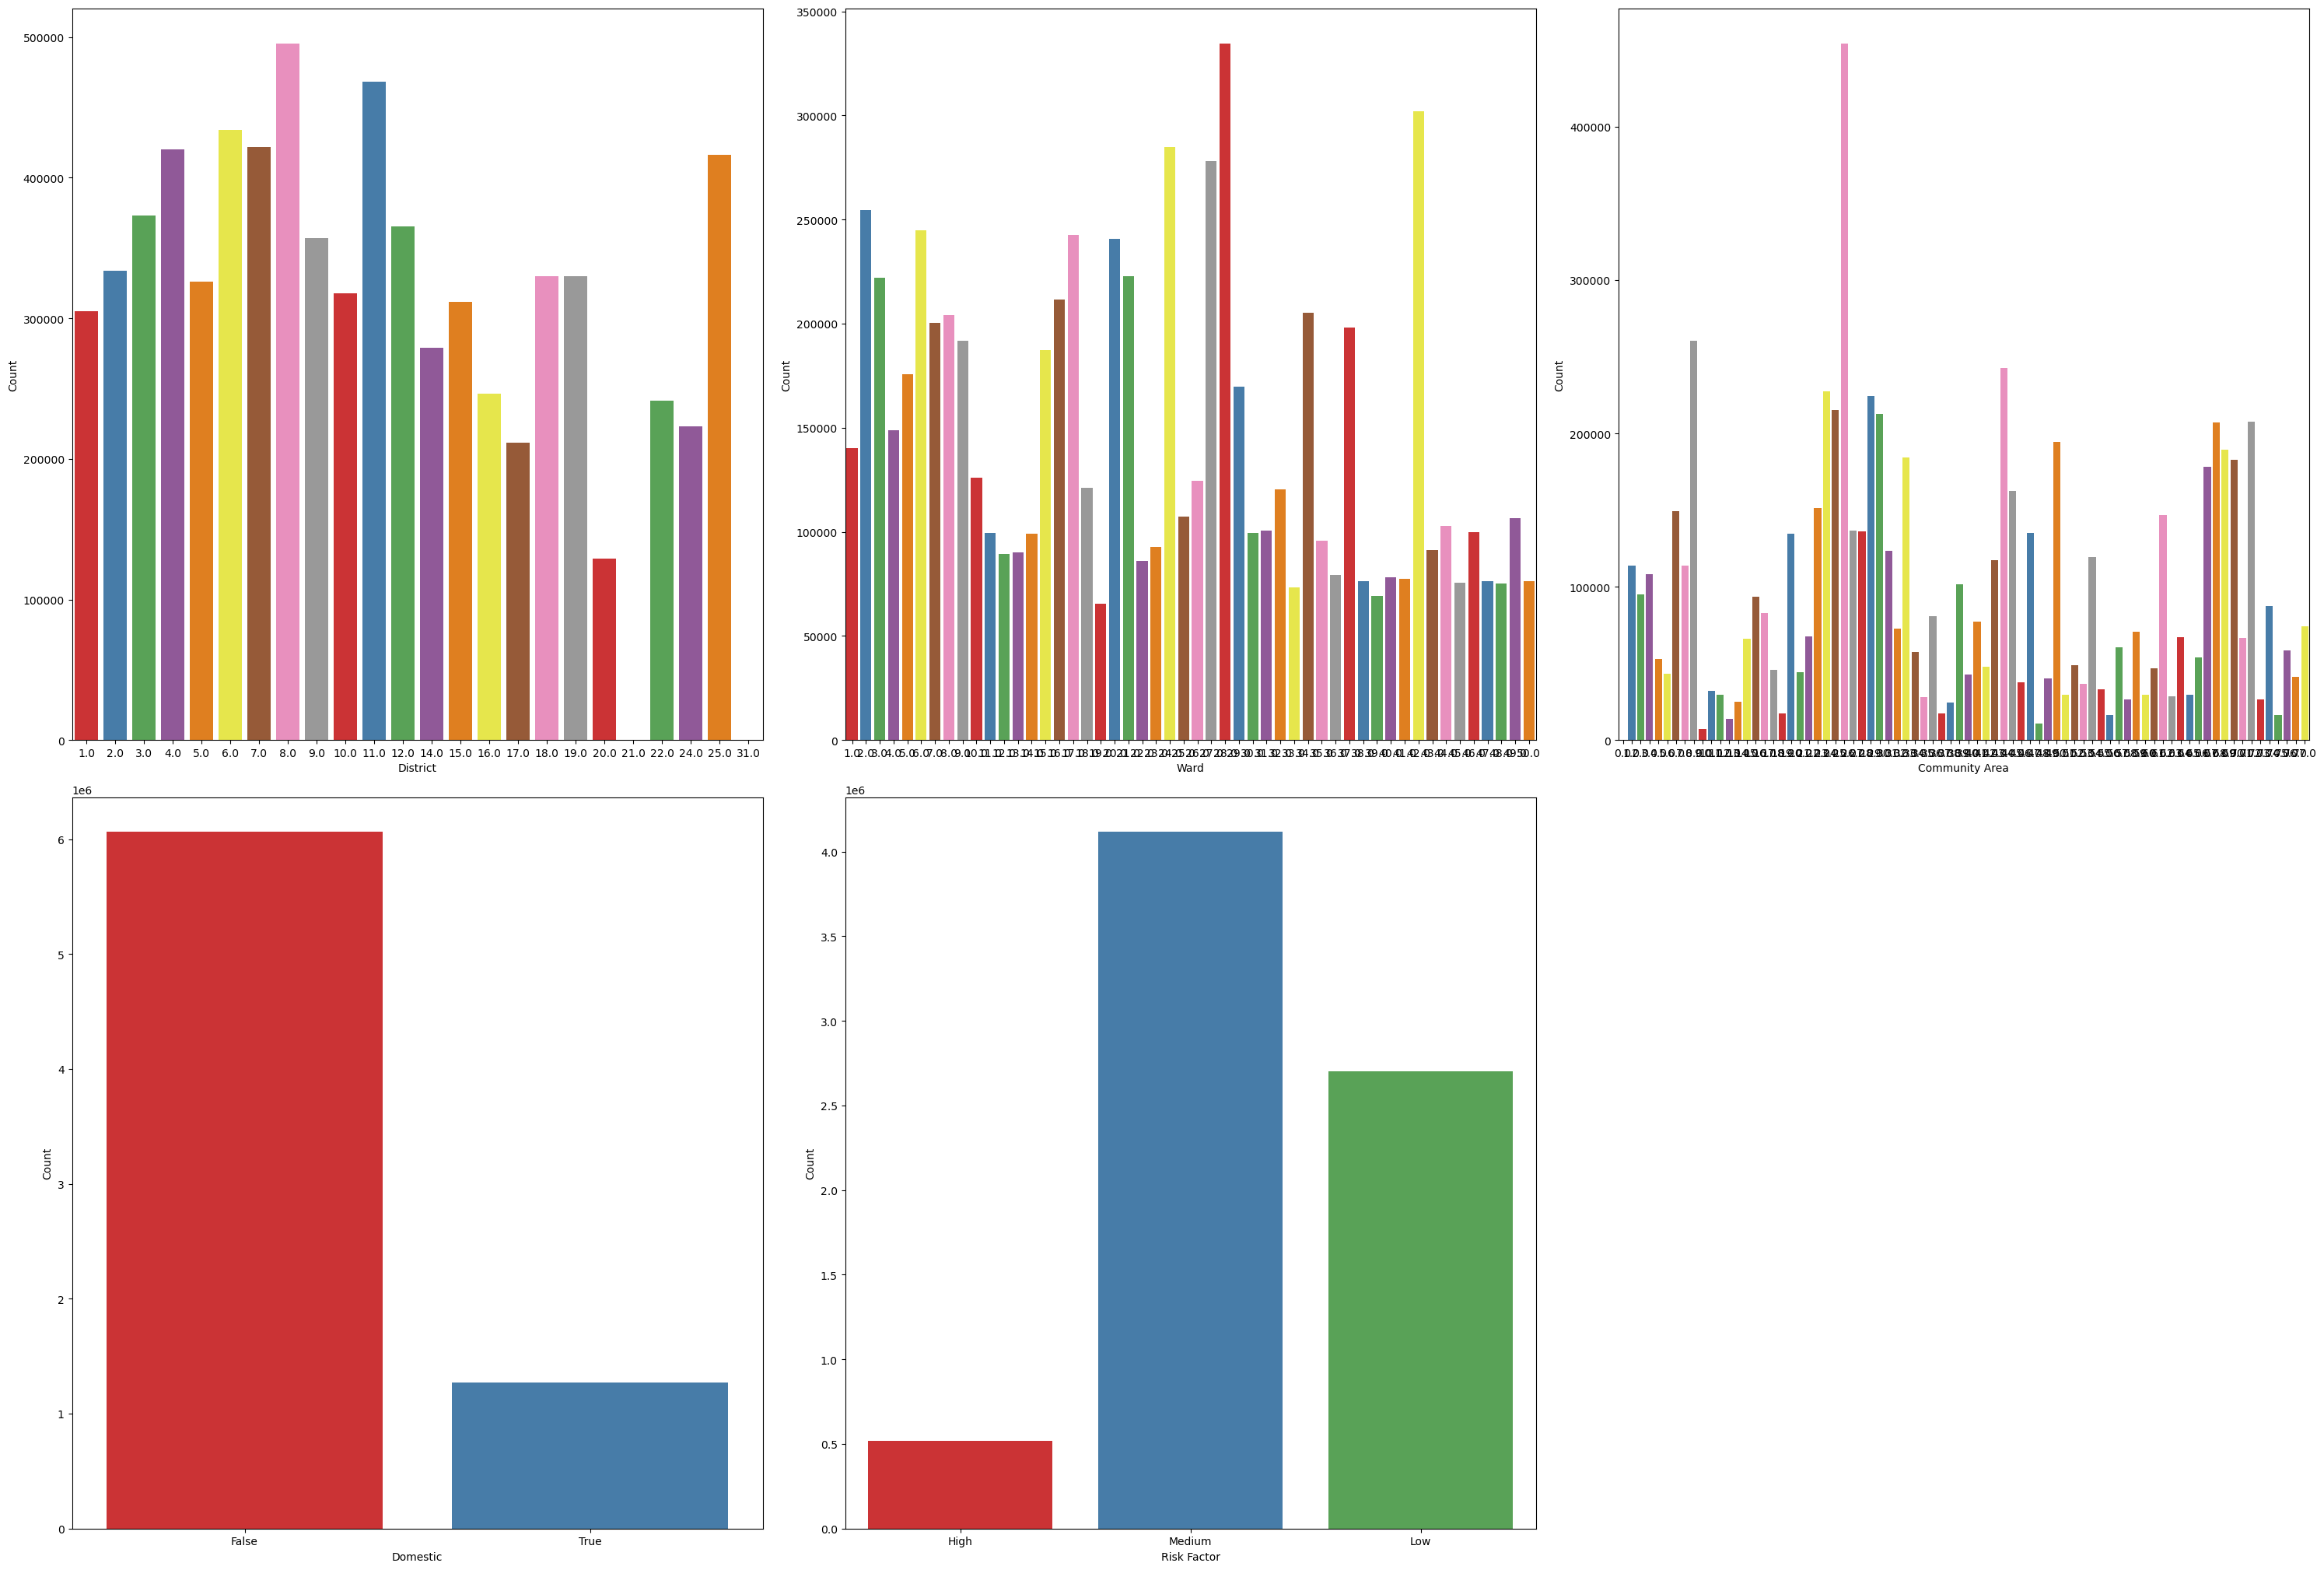

In [30]:
#Count of categories in each variable
plt.figure(figsize=(30, 30))
ind=1
for variable in categorical_columns:
    plt.subplot(3,3,ind)
    sns.countplot(x=df2[variable],palette='Set1')
    plt.ylabel('Count')
    plt.xlabel(variable)
    ind+=1
plt.tight_layout()
plt.show()

In [31]:
Numerical_columns = ['Year', 'Month', 'Hour', 'Day',
       'DayOfWeek']

In [32]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df2, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df2, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df2, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

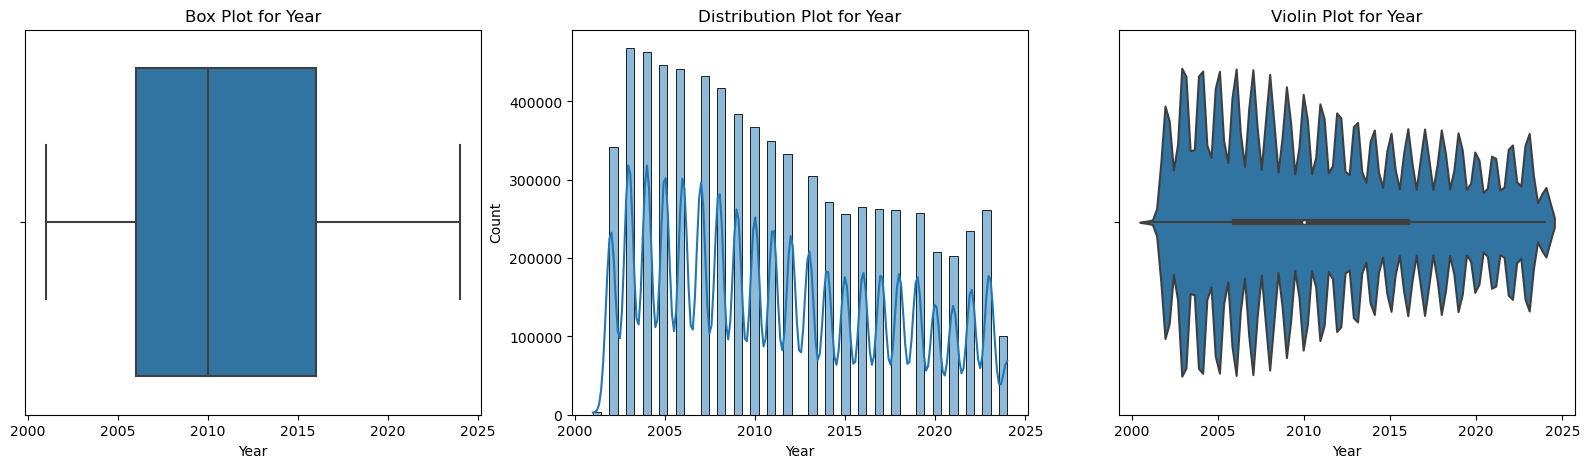

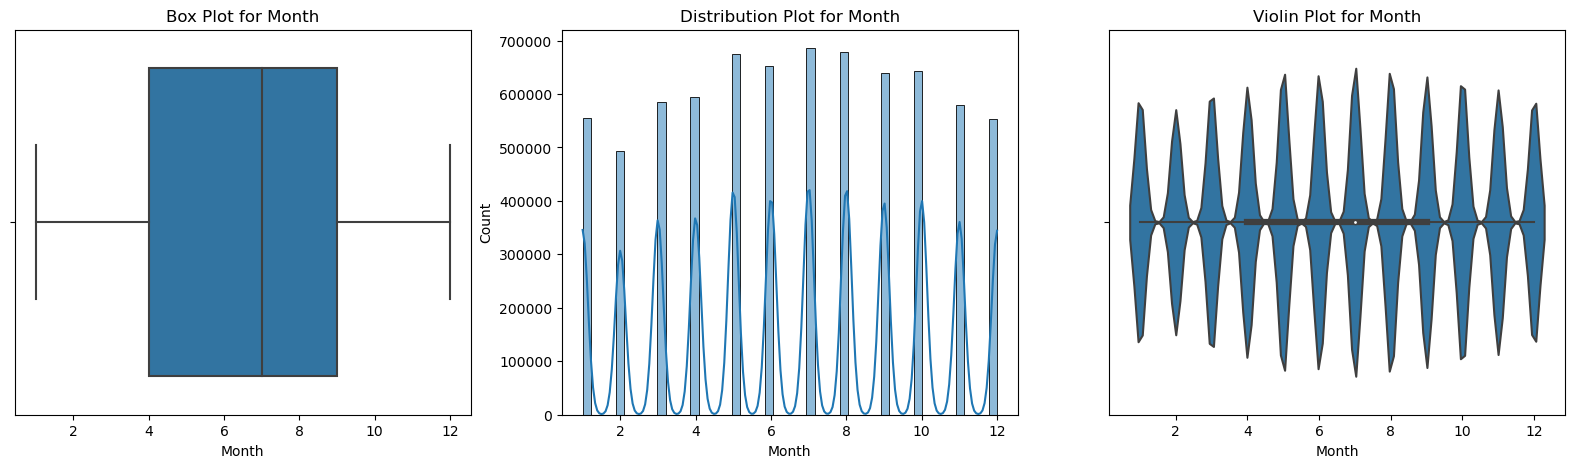

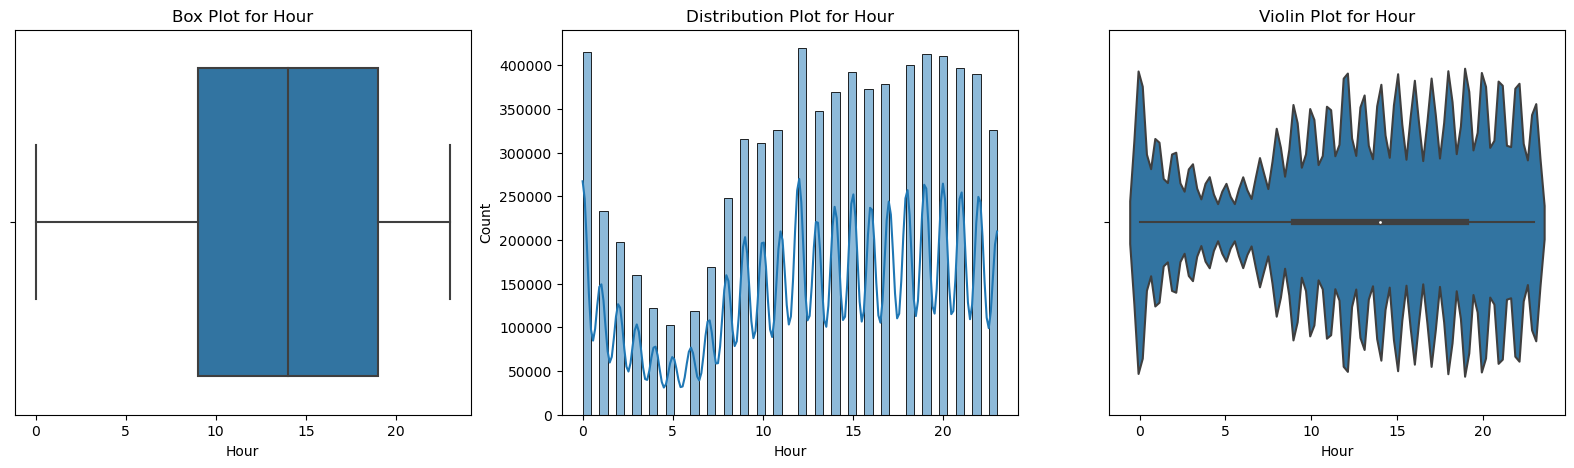

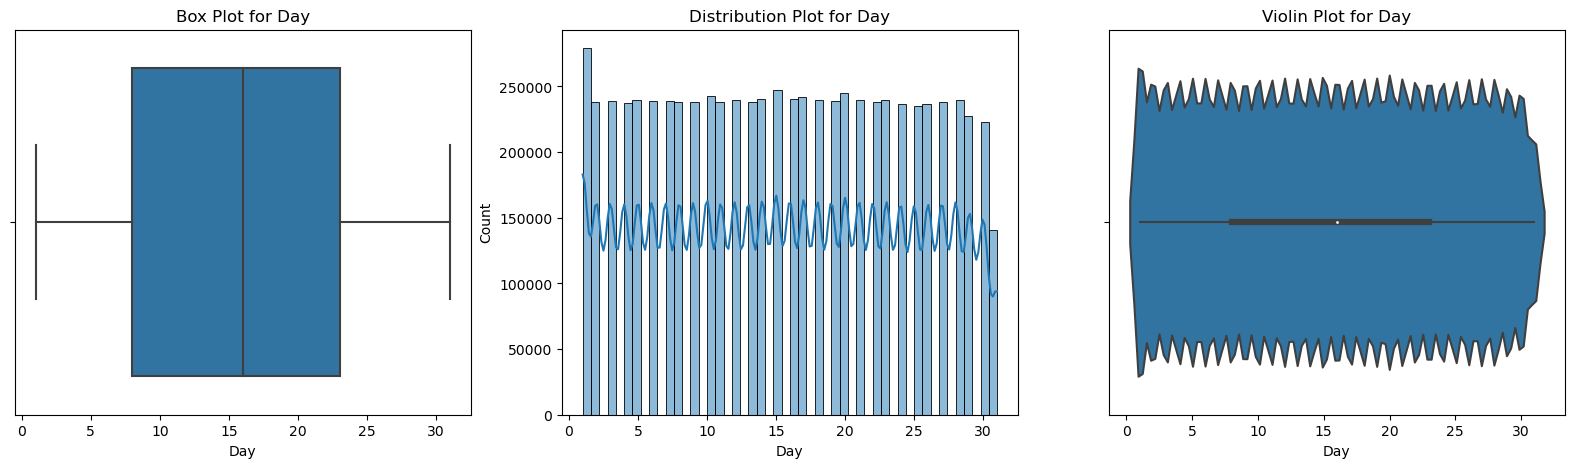

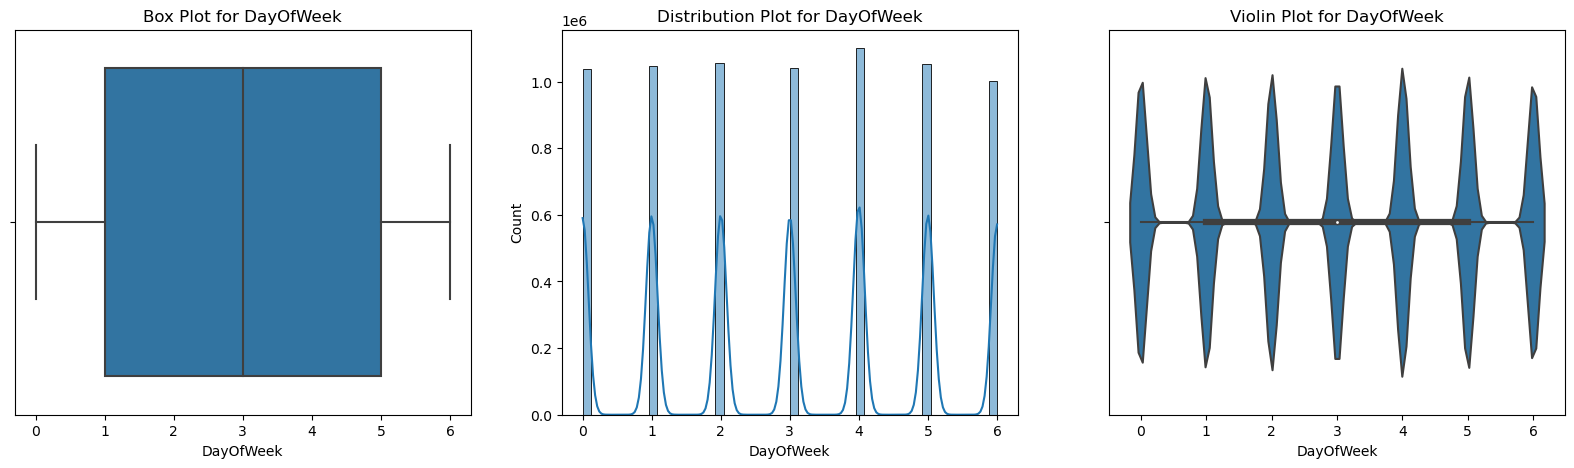

In [33]:
for i in Numerical_columns:
    plot(df2, i)

In [34]:
df2.columns

Index(['Description', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'Latitude', 'Longitude', 'Risk Factor', 'Year', 'Month', 'Hour', 'Day',
       'DayOfWeek'],
      dtype='object')

In [35]:
df2.isnull().sum()

Description       0
Domestic          0
Beat              0
District          0
Ward              0
Community Area    0
Latitude          0
Longitude         0
Risk Factor       0
Year              0
Month             0
Hour              0
Day               0
DayOfWeek         0
dtype: int64

In [36]:
output_path = r"C:\Users\igomp\OneDrive\Desktop\Projects_Data_scince\chicago crime\chicago_crime_data\crime_ML.csv"

# Save df2 to the specified path
df2.to_csv(output_path, index=False)
